In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [2]:
path = r"C:\Users\17436\OneDrive\desktop\ECSE 552\Project\final_results1"

In [3]:
with open(f"{path}/act_CNN_LSTM_AM.json", 'r') as file:
    # Load JSON data from the file
    act = json.load(file)

with open(f"{path}/pred_CNN_LSTM_AM.json", 'r') as file:
    # Load JSON data from the file
    pred = json.load(file)

In [4]:
companies = pd.read_csv(r"C:\Users\17436\OneDrive\desktop\ECSE 552\Project\dataset\nasdaq_screener.csv")
companies = companies [['Symbol','Sector']]
result=companies['Symbol'].isin(list(act.keys()))
companies = companies[result]
companies = companies.reset_index(drop=True,inplace=False)
grouped=companies.groupby('Sector')

RMSE Calculations for Sector

In [5]:
rmse_over_sector = {}
for symbol,group in grouped:
  print(symbol)
  avg_mse=0
  for value in group['Symbol']:
    tmp_act=act[value]
    tmp_pred=pred[value]
    avg_mse+=np.sqrt(mean_squared_error(tmp_act,tmp_pred))
  print("Average RMSE", avg_mse/len(group))
  rmse_over_sector[symbol]=avg_mse/len(group)

Basic Materials
Average RMSE 6.055424391575706
Consumer Discretionary
Average RMSE 15.630619006062402
Consumer Staples
Average RMSE 13.005093843047693
Energy
Average RMSE 11.594152494219655
Finance
Average RMSE 9.610319624483349
Health Care
Average RMSE 15.066855299105189
Industrials
Average RMSE 17.83416159829649
Miscellaneous
Average RMSE 11.139492429019796
Real Estate
Average RMSE 11.021146562554426
Technology
Average RMSE 15.866554873152458
Telecommunications
Average RMSE 6.182782633791746
Utilities
Average RMSE 4.746164941754719


MSE Calculcations for Sector

In [6]:
avg_price_of_stocks_in_sector={}
print("Average Price of Stocks Present in Each Sector")
for symbol,group in grouped:
  print(symbol)
  avg_stock_price=0
  for value in group['Symbol']:
    avg_stock_price+=sum(act[value])/len(act[value])
  print("Average Stock Price in Sector:", (avg_stock_price/len(group)))
  avg_price_of_stocks_in_sector[symbol]=(avg_stock_price/len(group))

Average Price of Stocks Present in Each Sector
Basic Materials
Average Stock Price in Sector: 30.780917685037636
Consumer Discretionary
Average Stock Price in Sector: 100.32481770894297
Consumer Staples
Average Stock Price in Sector: 75.77422191843567
Energy
Average Stock Price in Sector: 45.19987908559301
Finance
Average Stock Price in Sector: 64.29176022277001
Health Care
Average Stock Price in Sector: 92.40844806720193
Industrials
Average Stock Price in Sector: 114.08481211638765
Miscellaneous
Average Stock Price in Sector: 58.091005282571096
Real Estate
Average Stock Price in Sector: 82.26070830066635
Technology
Average Stock Price in Sector: 79.74213941384609
Telecommunications
Average Stock Price in Sector: 37.251314584187995
Utilities
Average Stock Price in Sector: 55.485814637444236


MAPE Calculation for Sector

In [7]:
ind_company_mape={}
mape_sector={}
print("Average MAPE per Sector")
for symbol,group in grouped:
  print(symbol)
  avg_mape=0
  tmp_act=[]
  tmp_pred=[]
  for value in group['Symbol']:
    ind_company_mape[value]=mean_absolute_percentage_error(act[value],pred[value])
    tmp_act+=act[value]
    tmp_pred+=pred[value]
    avg_mape+=mean_absolute_percentage_error(tmp_act,tmp_pred)
  print("Average MAPE:", (avg_mape/len(group))*100)
  mape_sector[symbol]=100*avg_mape/len(group)

Average MAPE per Sector
Basic Materials
Average MAPE: 21.07486835877629
Consumer Discretionary
Average MAPE: 18.85613918521956
Consumer Staples
Average MAPE: 13.135370738091906
Energy
Average MAPE: 21.016313683331497
Finance
Average MAPE: 12.999474357701068
Health Care
Average MAPE: 21.664165652026117
Industrials
Average MAPE: 17.381613032828927
Miscellaneous
Average MAPE: 16.480666552366134
Real Estate
Average MAPE: 16.59967002788297
Technology
Average MAPE: 18.083265583827625
Telecommunications
Average MAPE: 15.011233284114855
Utilities
Average MAPE: 7.719667358096029


RMSE Plots

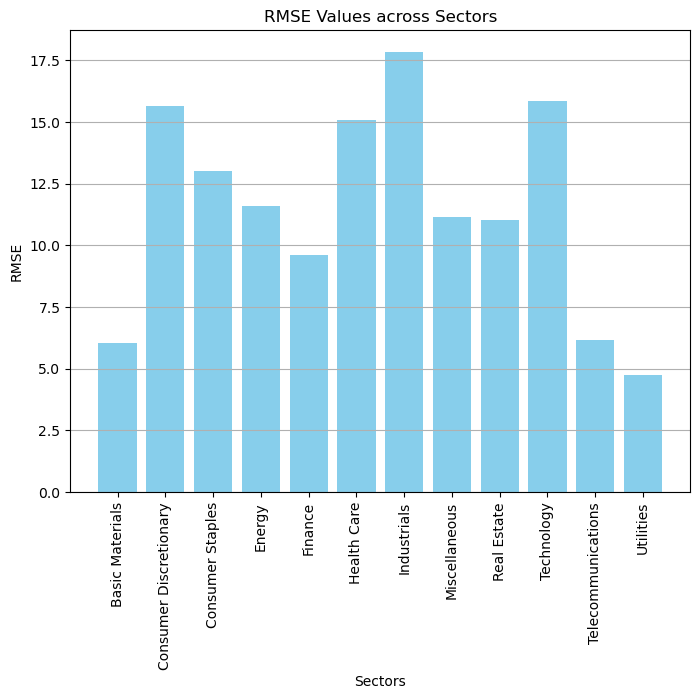

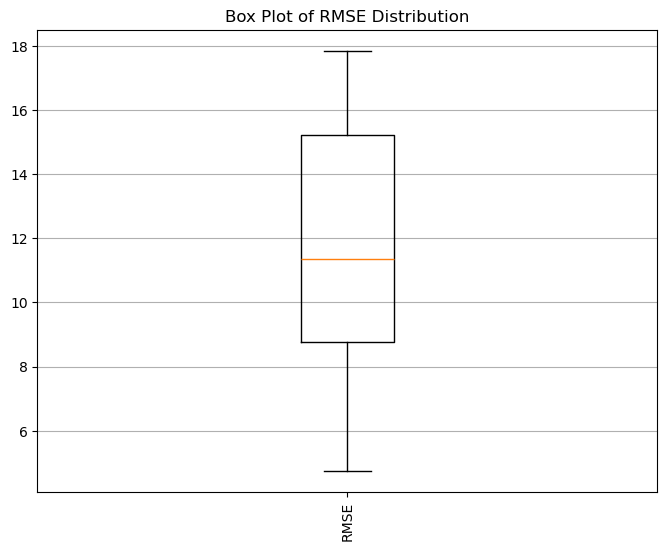

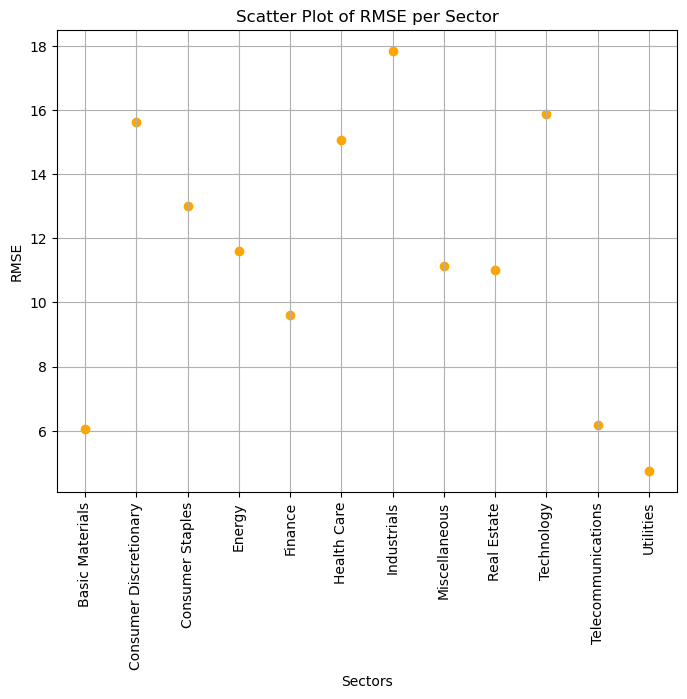

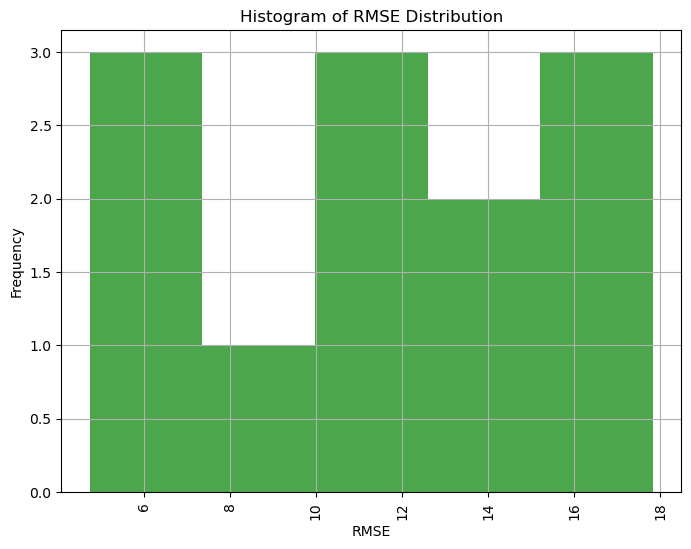

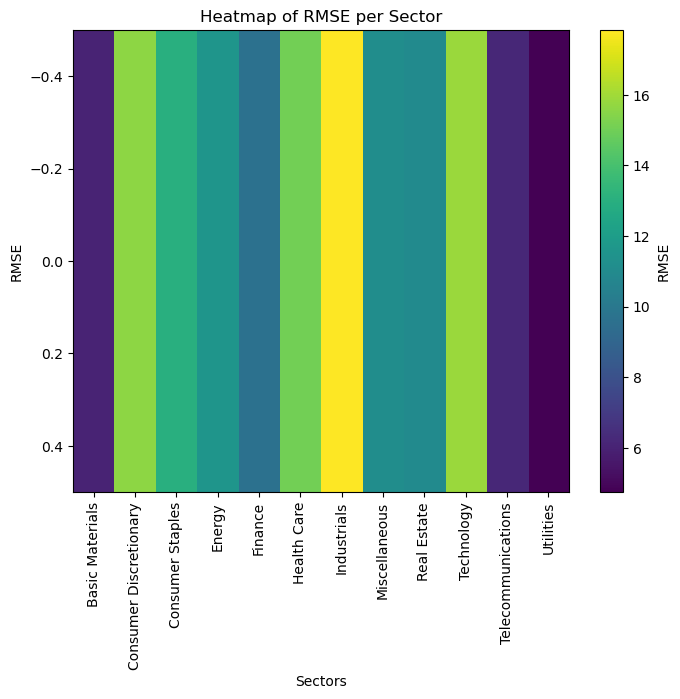

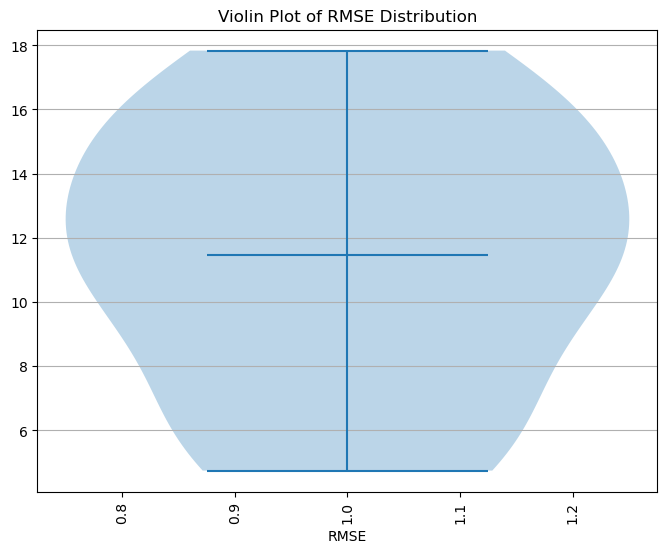

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)

# Bar plot for RMSE values across sectors
plt.figure(figsize=(8, 6))
sectors = list(rmse_over_sector.keys())
rmse_values = list(rmse_over_sector.values())
plt.bar(sectors, rmse_values, color='skyblue')
plt.xlabel('Sectors')
plt.ylabel('RMSE')
plt.title('RMSE Values across Sectors')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.savefig(f'{path}/Bar_chart_CNN_LSTM_AM.png')
plt.show()

# Box plot for RMSE distribution
plt.figure(figsize=(8, 6))
plt.boxplot(rmse_values, labels=['RMSE'])
plt.title('Box Plot of RMSE Distribution')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

# Scatter plot for single RMSE value per sector
plt.figure(figsize=(8, 6))
plt.scatter(range(len(sectors)), rmse_values, color='orange')
plt.xticks(range(len(sectors)), sectors)
plt.xlabel('Sectors')
plt.xticks(rotation=90)
plt.ylabel('RMSE')
plt.title('Scatter Plot of RMSE per Sector')
plt.grid(True)
plt.show()

# Histogram for RMSE distribution
plt.figure(figsize=(8, 6))
plt.hist(rmse_values, bins=5, color='green', alpha=0.7)
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.title('Histogram of RMSE Distribution')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Heatmap for single RMSE value per sector
plt.figure(figsize=(8, 6))
hm_data = np.array([rmse_values])
plt.imshow(hm_data, cmap='viridis', aspect='auto')
plt.colorbar(label='RMSE')
plt.xticks(np.arange(len(sectors)), sectors)
plt.xlabel('Sectors')
plt.ylabel('RMSE')
plt.title('Heatmap of RMSE per Sector')
plt.xticks(rotation=90)
plt.show()

# Violin plot for RMSE distribution
plt.figure(figsize=(8, 6))
plt.violinplot(rmse_values, showmeans=True)
plt.xlabel('RMSE')
plt.title('Violin Plot of RMSE Distribution')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.savefig(f'{path}/Violin_chart_CNN_LSTM_AM.png')
plt.show()

MAPE Plots

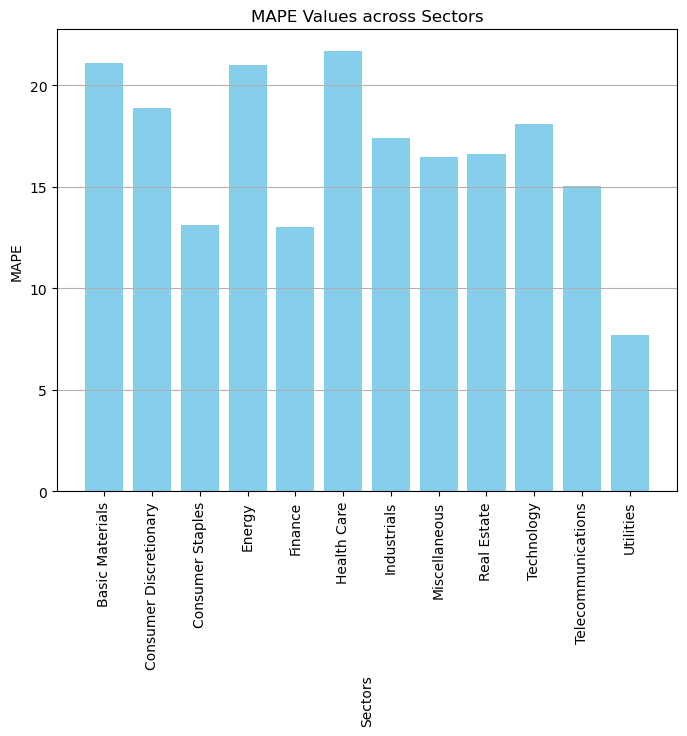

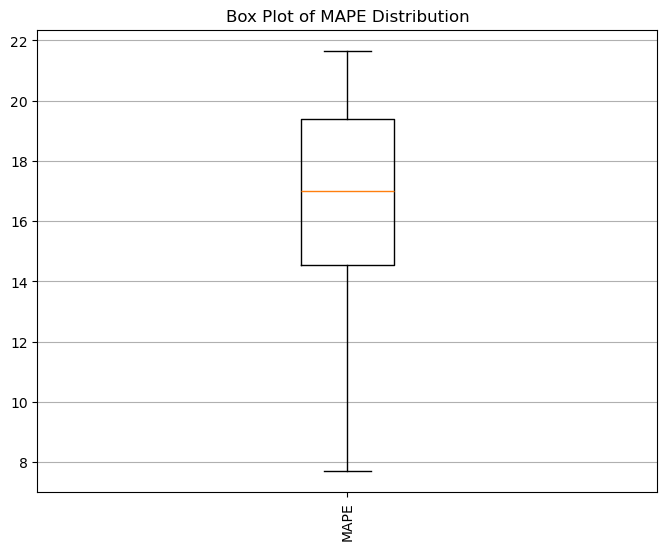

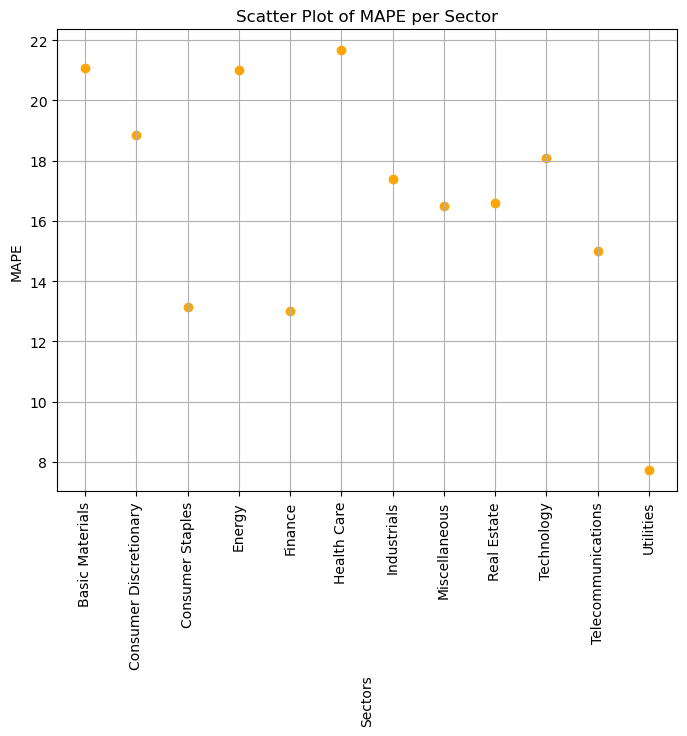

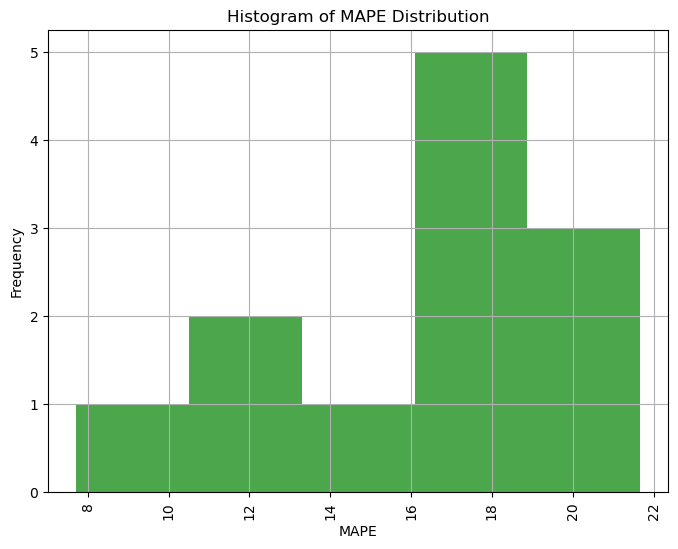

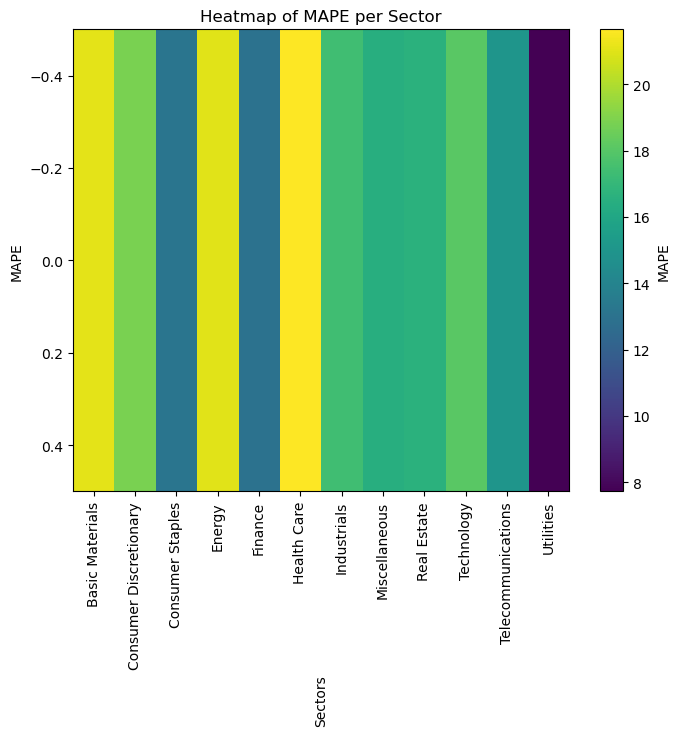

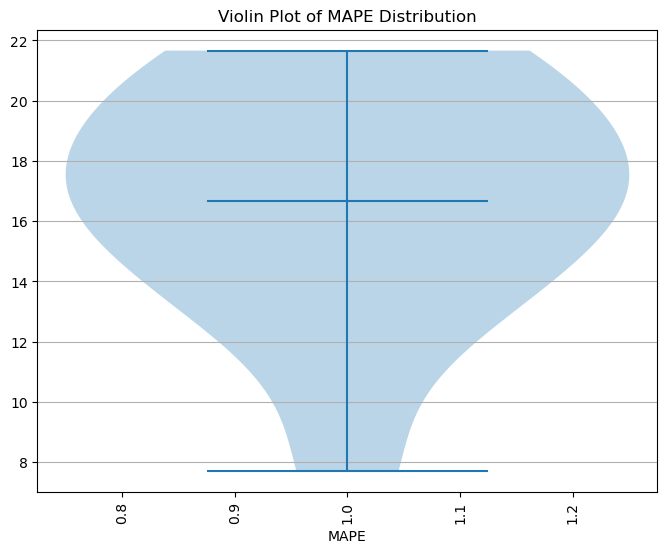

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)

# Bar plot for MAPE values across sectors
plt.figure(figsize=(8, 6))
sectors = list(mape_sector.keys())
mape_values = list(mape_sector.values())
plt.bar(sectors, mape_values, color='skyblue')
plt.xlabel('Sectors', rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.ylabel('MAPE')
plt.title('MAPE Values across Sectors')
plt.xticks(rotation=90)  # Rotate y-axis tick labels by 90 degrees
plt.grid(axis='y')
plt.show()

# Box plot for MAPE distribution
plt.figure(figsize=(8, 6))
plt.boxplot(mape_values, labels=['MAPE'])
plt.title('Box Plot of MAPE Distribution')
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.grid(axis='y')
plt.show()

# Scatter plot for single MAPE value per sector
plt.figure(figsize=(8, 6))
plt.scatter(range(len(sectors)), mape_values, color='orange')
plt.xticks(range(len(sectors)), sectors, rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.xlabel('Sectors', rotation=90)  # Rotate x-axis label by 90 degrees
plt.ylabel('MAPE')
plt.title('Scatter Plot of MAPE per Sector')
plt.grid(True)
plt.show()

# Histogram for MAPE distribution
plt.figure(figsize=(8, 6))
plt.hist(mape_values, bins=5, color='green', alpha=0.7)
plt.xlabel('MAPE')
plt.ylabel('Frequency')
plt.title('Histogram of MAPE Distribution')
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.grid(True)
plt.show()

# Heatmap for single MAPE value per sector
plt.figure(figsize=(8, 6))
hm_data = np.array([mape_values])
plt.imshow(hm_data, cmap='viridis', aspect='auto')
plt.colorbar(label='MAPE')
plt.xticks(np.arange(len(sectors)), sectors, rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.xlabel('Sectors', rotation=90)  # Rotate x-axis label by 90 degrees
plt.ylabel('MAPE')
plt.title('Heatmap of MAPE per Sector')
plt.show()

# Violin plot for MAPE distribution
plt.figure(figsize=(8, 6))
plt.violinplot(mape_values, showmeans=True)
plt.xlabel('MAPE')
plt.title('Violin Plot of MAPE Distribution')
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.grid(axis='y')
plt.show()


In [10]:
rmse_over_sector = {}
mape_over_sector = {}
avg_stock_price_over_sector = {}

print("Average Metrics per Sector")
for symbol, group in grouped:
    print(symbol)
    avg_mse = 0
    avg_mape = 0
    avg_stock_price = 0
    
    # Calculate RMSE and MAPE
    for value in group['Symbol']:
        tmp_act = act[value]
        tmp_pred = pred[value]
        avg_mse += np.sqrt(mean_squared_error(tmp_act, tmp_pred))
        avg_mape += mean_absolute_percentage_error(tmp_act, tmp_pred)
        avg_stock_price+=sum(act[value])/len(act[value])
    # Calculate average stock price using the same method as the first code
    
    # Calculate averages
    avg_rmse = avg_mse / len(group)
    avg_mape = (avg_mape / len(group)) * 100
    
    print("Average RMSE:", avg_rmse)
    print("Average MAPE:", avg_mape)
    print("Average Stock Price in Sector:", (avg_stock_price/len(group)))
    
    rmse_over_sector[symbol] = avg_rmse
    mape_over_sector[symbol] = avg_mape
    avg_stock_price_over_sector[symbol] = (avg_stock_price/len(group))

# Convert to DataFrame
df_metrics = pd.DataFrame({
    'Sector': list(rmse_over_sector.keys()),
    'Average RMSE': list(rmse_over_sector.values()),
    'Average MAPE': list(mape_over_sector.values()),
    'Average Stock Price': list(avg_stock_price_over_sector.values())
})

Average Metrics per Sector
Basic Materials
Average RMSE: 6.055424391575706
Average MAPE: 22.87594264421182
Average Stock Price in Sector: 30.780917685037636
Consumer Discretionary
Average RMSE: 15.630619006062402
Average MAPE: 19.080945221144706
Average Stock Price in Sector: 100.32481770894297
Consumer Staples
Average RMSE: 13.005093843047693
Average MAPE: 13.323610786207837
Average Stock Price in Sector: 75.77422191843567
Energy
Average RMSE: 11.594152494219655
Average MAPE: 22.963688364783028
Average Stock Price in Sector: 45.19987908559301
Finance
Average RMSE: 9.610319624483349
Average MAPE: 12.87624474774115
Average Stock Price in Sector: 64.29176022277001
Health Care
Average RMSE: 15.066855299105189
Average MAPE: 21.36734067959727
Average Stock Price in Sector: 92.40844806720193
Industrials
Average RMSE: 17.83416159829649
Average MAPE: 17.076082186170762
Average Stock Price in Sector: 114.08481211638765
Miscellaneous
Average RMSE: 11.139492429019796
Average MAPE: 17.113978755946

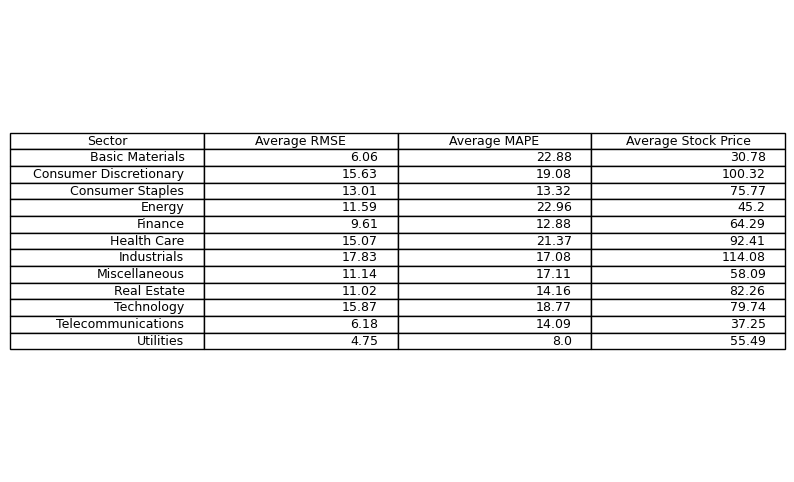

In [23]:
df_metrics = df_metrics.round(2)
table = df_metrics.to_latex(index=False)

# Plotting parameters
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')  # Turn off axis
ax.table(cellText=df_metrics.values, colLabels=df_metrics.columns, loc='center')
plt.savefig(f'{path}/table_CNN_LSTM_AM.png')

In [12]:
with open(r"C:\Users\17436\OneDrive\desktop\ECSE 552\Project\final_results1\pct_CNN_LSTM_AM.json", 'r') as f1:
    data1 = json.load(f1)

min_key = min(data1, key=data1.get)
min_value = data1[min_key]

print("Minimum value:", min_value)
print("Corresponding key:", min_key)

Minimum value: 0.014125959078519828
Corresponding key: ODC


In [13]:
companies = pd.read_csv(r"C:\Users\17436\OneDrive\desktop\ECSE 552\Project\dataset\main.csv")

In [14]:
min_company_info = companies[companies['Symbol'] == min_key]

In [15]:
with open(r"C:\Users\17436\OneDrive\desktop\ECSE 552\Project\final_results1\act_CNN_LSTM_AM.json", 'r') as f1:
    data1 = json.load(f1)

# Load the second JSON file
with open(r"C:\Users\17436\OneDrive\desktop\ECSE 552\Project\final_results1\pred_CNN_LSTM_AM.json", 'r') as f2:
    data2 = json.load(f2)

print("data1", data1)
print("data2", data2)

data1 {'A': [100.41468713992879, 117.2911476370729, 126.4112696096231, 141.99396670346616, 163.31796719486914, 152.25225652520297], 'AAON': [42.22349201180609, 48.984945982457184, 44.128783025623676, 43.39227503975262, 49.95301631766108, 40.947830744160996], 'AAP': [154.1833328860409, 167.56209617691266, 195.81206366627185, 208.36460409814157, 228.23206590328712, 220.2041279644661], 'AAPL': [109.00908684161585, 120.08428605692627, 128.42790275751906, 129.3338094559238, 147.31380869257697, 157.7269834588252], 'AB': [31.57777790132279, 37.46758060450906, 43.46476189409263, 49.28015843545591, 52.33999955146687, 46.53809519306474], 'ABCB': [32.283333266229256, 47.365806530156654, 53.74920671038722, 48.62968264892348, 51.72047653627108, 49.273016022520714], 'ABEV': [2.691428587632916, 2.827580648033269, 3.242857134493449, 3.172063500960614, 2.8663492161170336, 2.793650801250344], 'ABG': [123.63492097433974, 168.20983769115992, 192.71873265313815, 188.33238318070875, 184.2668260888369, 174.9

In [16]:
min_act = data1[min_key]
min_pred = data2[min_key]

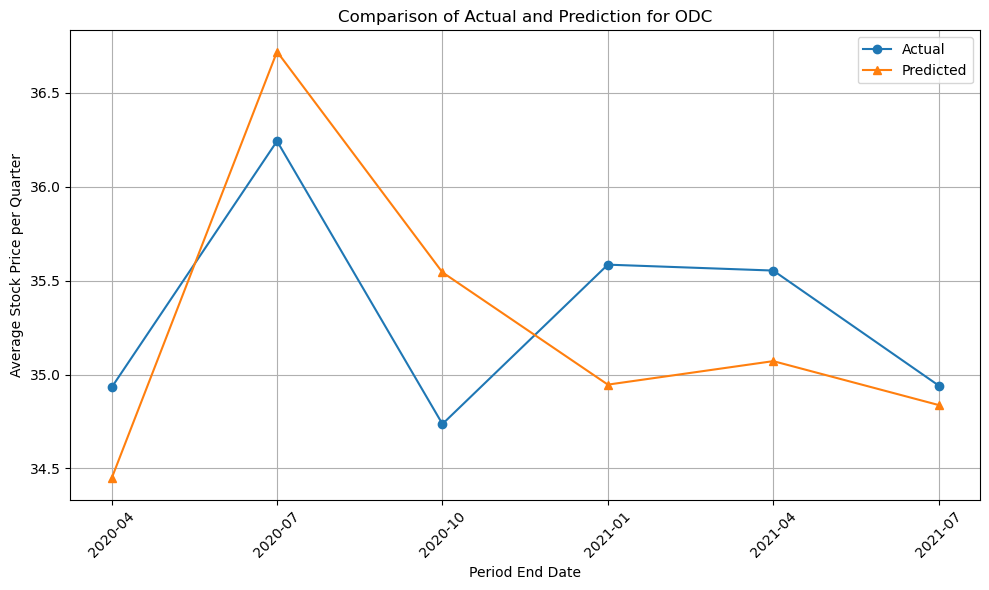

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(min_company_info['period_end_date'].iloc[-6:], min_act, marker='o', label='Actual')  # Use dots for actual data points
plt.plot(min_company_info['period_end_date'].iloc[-6:], min_pred, marker='^', label='Predicted')  # Use triangles for predicted data points
plt.title('Comparison of Actual and Prediction for ' + min_key)
plt.xlabel('Period End Date')
plt.ylabel('Average Stock Price per Quarter')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [18]:
min_company_info = companies[companies['Symbol'] == min_key].iloc[:80]
min_company_info1 = companies[companies['Symbol'] == min_key].iloc[:80]
print("Information for the company with symbol:", min_key)
print(min_company_info)

Information for the company with symbol: ODC
       Symbol period_end_date   revenue  pretax_income  income_tax  \
122738    ODC         2001-10  40023000         373000     -106000   
122739    ODC         2002-01  43780000         107000      -33000   
122740    ODC         2002-04  39261000         724000     -220000   
122741    ODC         2002-07  39281000       -2763000      824000   
122742    ODC         2002-10  37730000         585000     -174000   
...       ...             ...       ...            ...         ...   
122813    ODC         2020-07  64844000        7588000    -1707000   
122814    ODC         2020-10  76097000        4755000     -806000   
122815    ODC         2021-01  74500000        5157000     -869000   
122816    ODC         2021-04  76255000        2162000       24000   
122817    ODC         2021-07  78129000        1294000     -737000   

        net_income_continuing  net_income_discontinued  net_income  \
122738               267000.0               

In [19]:
Average_Stock_Value_After_Result  = min_company_info.iloc[:, -1]

print(Average_Stock_Value_After_Result)

122738     5.791344
122739     6.964952
122740     7.082159
122741     6.230250
122742     6.665311
            ...    
122813    36.243125
122814    34.736393
122815    35.585079
122816    35.553651
122817    34.941406
Name: Average_Stock_Value_After_Result, Length: 80, dtype: float64


In [20]:
min_pred_length = len(min_pred)

# Get the last column of min_company_info
last_column = min_company_info.iloc[:, -1]

# Replace the last min_pred_length elements of the last column with values from min_pred
last_column.iloc[-min_pred_length:] = min_pred[:min_pred_length]

# Update the last column in min_company_info
min_company_info.iloc[:, -1] = last_column

print(min_company_info)

       Symbol period_end_date   revenue  pretax_income  income_tax  \
122738    ODC         2001-10  40023000         373000     -106000   
122739    ODC         2002-01  43780000         107000      -33000   
122740    ODC         2002-04  39261000         724000     -220000   
122741    ODC         2002-07  39281000       -2763000      824000   
122742    ODC         2002-10  37730000         585000     -174000   
...       ...             ...       ...            ...         ...   
122813    ODC         2020-07  64844000        7588000    -1707000   
122814    ODC         2020-10  76097000        4755000     -806000   
122815    ODC         2021-01  74500000        5157000     -869000   
122816    ODC         2021-04  76255000        2162000       24000   
122817    ODC         2021-07  78129000        1294000     -737000   

        net_income_continuing  net_income_discontinued  net_income  \
122738               267000.0                        0      267000   
122739             

C:\Users\17436\AppData\Local\Temp\ipykernel_12404\989742285.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_column.iloc[-min_pred_length:] = min_pred[:min_pred_length]


In [21]:
min_pred

[34.446865163688145,
 36.71937669886017,
 35.544140413556114,
 34.946157294427465,
 35.07131359883408,
 34.837523638372964]

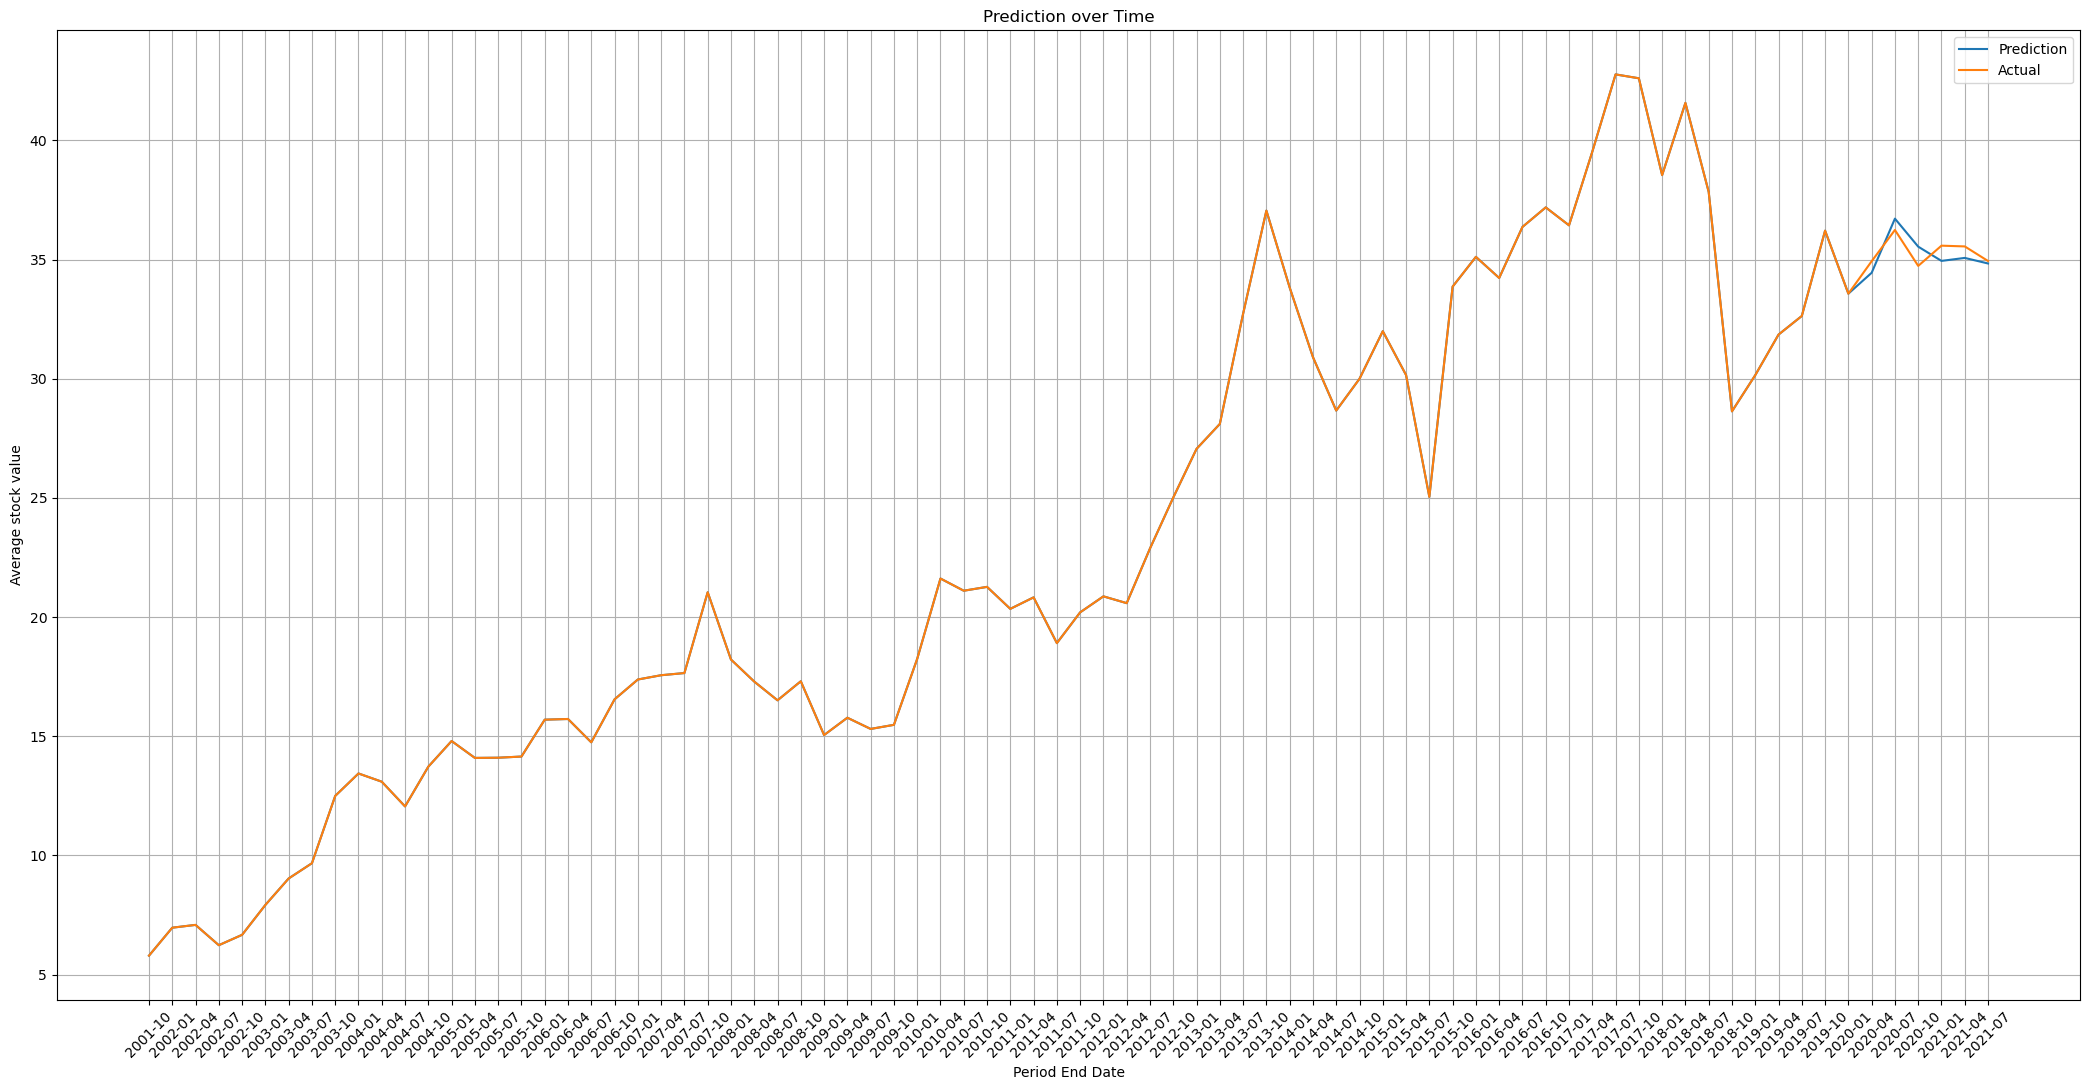

In [22]:
plt.figure(figsize=(21, 11))
plt.plot(min_company_info["period_end_date"], min_company_info.iloc[:, -1], label="Prediction")
plt.plot(min_company_info1["period_end_date"], min_company_info1.iloc[:, -1], label="Actual")
plt.xlabel("Period End Date")
plt.ylabel("Average stock value")
plt.title("Prediction over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [29]:
with open(f"{path}/act_CNN_LSTM_AM.json", 'r') as file:
    # Load JSON data from the file
    act = json.load(file)

with open(f"{path}/pred_CNN_LSTM_AM.json", 'r') as file:
    # Load JSON data from the file
    pred = json.load(file)

In [30]:
act

{'A': [100.41468713992879,
  117.2911476370729,
  126.4112696096231,
  141.99396670346616,
  163.31796719486914,
  152.25225652520297],
 'AAON': [42.22349201180609,
  48.984945982457184,
  44.128783025623676,
  43.39227503975262,
  49.95301631766108,
  40.947830744160996],
 'AAP': [154.1833328860409,
  167.56209617691266,
  195.81206366627185,
  208.36460409814157,
  228.23206590328712,
  220.2041279644661],
 'AAPL': [109.00908684161585,
  120.08428605692627,
  128.42790275751906,
  129.3338094559238,
  147.31380869257697,
  157.7269834588252],
 'AB': [31.57777790132279,
  37.46758060450906,
  43.46476189409263,
  49.28015843545591,
  52.33999955146687,
  46.53809519306474],
 'ABCB': [32.283333266229256,
  47.365806530156654,
  53.74920671038722,
  48.62968264892348,
  51.72047653627108,
  49.273016022520714],
 'ABEV': [2.691428587632916,
  2.827580648033269,
  3.242857134493449,
  3.172063500960614,
  2.8663492161170336,
  2.793650801250344],
 'ABG': [123.63492097433974,
  168.2098376

In [34]:
mse_values = []
for symbol, act_values in act.items():
    pred_values = pred.get(symbol)
    mse = (mean_squared_error(act_values, pred_values))
    mse_values.append(mse)

# Compute average RMSE
average_mse = np.mean(mse_values)
average_rmse = np.sqrt(average_mse)
print("Average RMSE:",average_rmse)

Average RMSE: 28.963741792714426
